# Analisis de los antecedentes
## CASO 4 - Problema Aseguradora

![Tabla de Antecedentes](img/tabla_antecedentes.png)

## Importar librerias

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Graficas de antecedentes

### Funciones

In [3]:
def show_graph(x, y, x_label, y_label, title, label="Prima"):
  plt.plot(x, y, marker='o', linestyle='-', color='b', label=label)

  # Personalizar la gráfica
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)
  plt.xticks(x)
  plt.legend()
  plt.grid(True)

  # Mostrar la gráfica
  plt.show()

### Cantidad de reparaciones

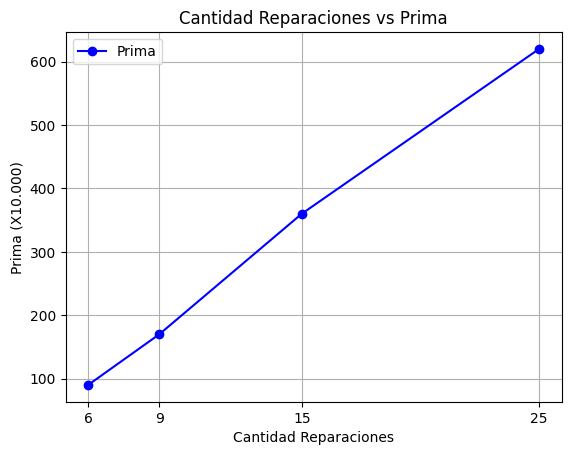

In [4]:
# Datos
cantidad_reparaciones = [6, 9, 15, 25]
cantidad_reparaciones_prima = [90, 170, 360, 620]

# Graficar
show_graph(cantidad_reparaciones, cantidad_reparaciones_prima, "Cantidad Reparaciones", "Prima (X10.000)", "Cantidad Reparaciones vs Prima")

### Monto de reparaciones

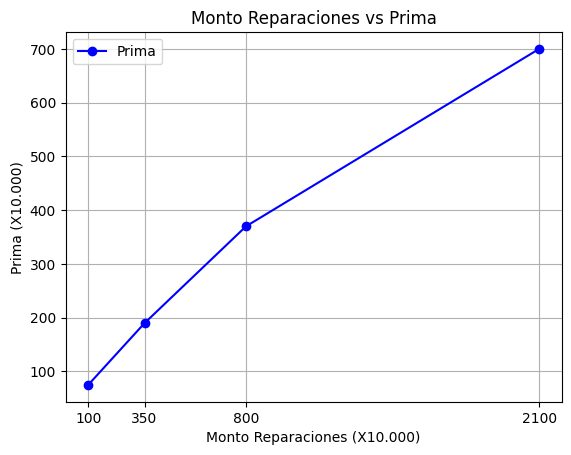

In [5]:
# Datos
monto_reparaciones = [100, 350, 800, 2100]
monto_reparaciones_prima = [75, 190, 370, 700]

# Graficar
show_graph(monto_reparaciones, monto_reparaciones_prima, "Monto Reparaciones (X10.000)", "Prima (X10.000)", "Monto Reparaciones vs Prima")

### Antiguedad del seguro

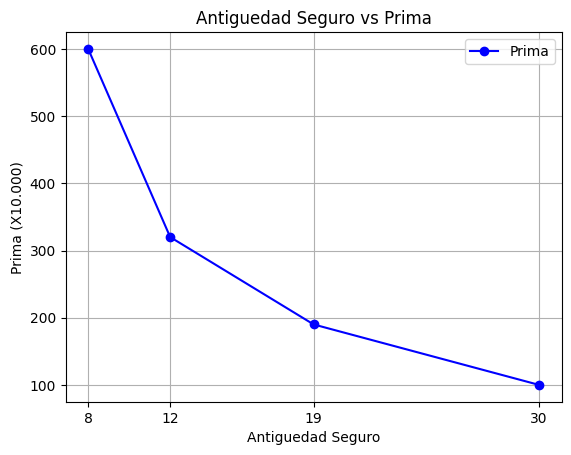

In [6]:
# Datos
antiguedad_seguro = [8, 12, 19, 30]
antiguedad_seguro_prima = [600, 320, 190, 100]

# Graficar
show_graph(antiguedad_seguro, antiguedad_seguro_prima, "Antiguedad Seguro", "Prima (X10.000)", "Antiguedad Seguro vs Prima")

### Calificacion promedio

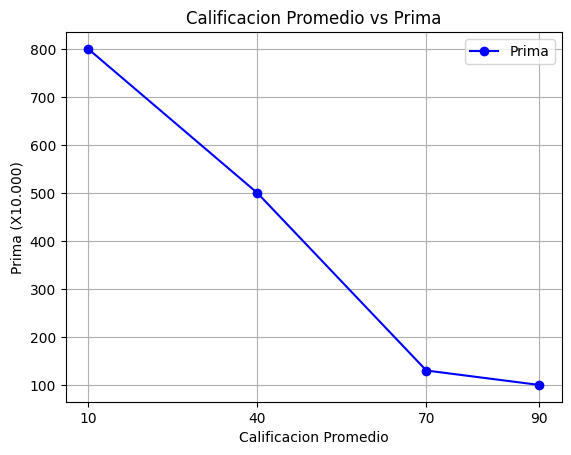

In [7]:
# Datos
calificacion_promedio = [10, 40, 70, 90]
calificacion_promedio_prima = [800, 500, 130, 100]

# Graficar
show_graph(calificacion_promedio, calificacion_promedio_prima, "Calificacion Promedio", "Prima (X10.000)", "Calificacion Promedio vs Prima")

## Simplificacion problema

### Funciones

In [8]:
def comparar_reduccion(x_original, y_original, x_reducido, y_reducido, x_label, title="Comparación de Reducción", metodo=""):
    """
    Compara la precisión de la reducción de una curva de 3 tramos a 2 tramos.

    Parámetros:
        x_original (list): Valores originales de X.
        y_original (list): Valores originales de Y.
        x_reducido (list): Valores reducidos de X.
        y_reducido (list): Valores reducidos de Y.

    Retorna:
        float: Error cuadrático medio (MSE) entre la función original y la reducida.
    """
    # Interpolar la función reducida en los mismos puntos de la original
    y_interpolada = np.interp(x_original, x_reducido, y_reducido)

    # Calcular el error cuadrático medio (MSE)
    mse = np.mean((np.array(y_original) - np.array(y_interpolada))**2)

    # Graficar comparación
    plt.plot(x_original, y_original, marker='o', linestyle='-', color='b', label="Original (3 tramos)")
    plt.plot(x_reducido, y_reducido, marker='o', linestyle='-', color='r', label="Reducido (2 tramos)")
    plt.plot(x_original, y_interpolada, linestyle='--', color='g', label="Interpolación Reducida")

    # Personalizar la gráfica
    plt.xlabel(x_label)
    plt.ylabel("Prima (X10.000)")
    plt.title(f"{title} vs Prima ({metodo}) (MSE: {mse:.2f})")
    plt.legend()
    plt.grid(True)
    plt.show()

    return mse

In [9]:
def reducir_a_dos_tramos(x, y):
    """
    Reduce la cantidad de tramos de 3 a 2 comparando las pendientes y fusionando las más similares.
    
    Parámetros:
        x (list): Lista con los valores del eje X.
        y (list): Lista con los valores del eje Y.
    
    Retorna:
        tuple: Nuevas listas x_reducido e y_reducido con solo 2 tramos.
    """
    # Calcular las pendientes entre cada punto
    pendientes = np.diff(y) / np.diff(x)

    # Encontrar el índice con la menor diferencia de pendiente (los más similares)
    dif_pendientes = np.abs(np.diff(pendientes))  # Diferencia entre pendientes consecutivas
    idx_fusion = np.argmin(dif_pendientes)  # Índice del tramo a fusionar
    
    # Fusionar los puntos tomando el promedio
    x_nuevo = x[:idx_fusion+1] + [ (x[idx_fusion+1] + x[idx_fusion+2]) / 2 ] + x[idx_fusion+3:]
    y_nuevo = y[:idx_fusion+1] + [ (y[idx_fusion+1] + y[idx_fusion+2]) / 2 ] + y[idx_fusion+3:]

    return x_nuevo, y_nuevo

In [10]:
def reducir_a_dos_tramos_regresion(x, y):
    """
    Reduce los tramos de 3 a 2 ajustando una regresión lineal a cada mitad de los datos.

    Parámetros:
        x (list): Lista con los valores del eje X.
        y (list): Lista con los valores del eje Y.

    Retorna:
        tuple: Nuevas listas x_reducido e y_reducido con solo 2 tramos.
    """
    # Dividir los datos en dos partes
    mitad = len(x) // 2

    # Ajustar una recta a cada parte (y = m*x + b)
    coef1 = np.polyfit(x[:mitad+1], y[:mitad+1], 1)  # Primera mitad
    coef2 = np.polyfit(x[mitad:], y[mitad:], 1)  # Segunda mitad

    # Generar nuevos puntos para los dos tramos
    x_reducido = [x[0], x[mitad], x[-1]]
    y_reducido = [np.polyval(coef1, x[0]), np.polyval(coef1, x[mitad]), np.polyval(coef2, x[-1])]

    return x_reducido, y_reducido


In [11]:
def mostrar_tramos(nombre, x, y, x_reducido, y_reducido):
  print(f"Tramos originales {nombre} (X):", x)
  print(f"Tramos originales {nombre} (Y):", y)
  print(f"Nuevos tramos {nombre} (X):", x_reducido)
  print(f"Nuevos tramos {nombre} (Y):", [int(y) for y in y_reducido])

### Cantidad de reparaciones

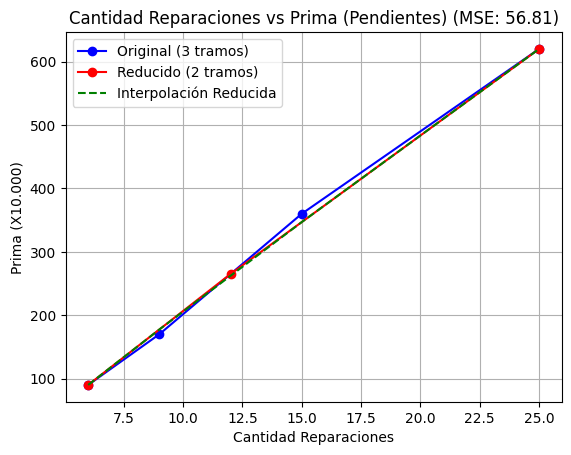

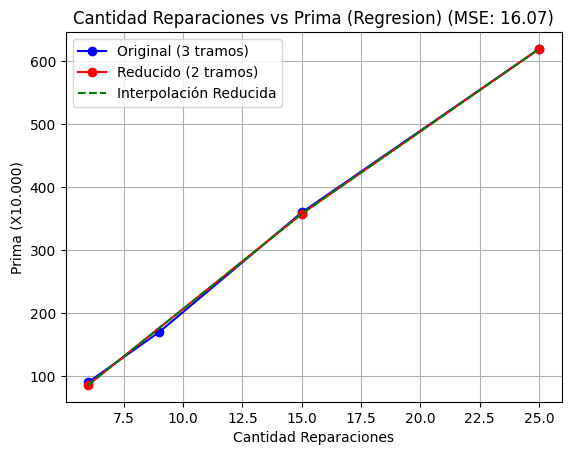

MSE Pendientes: 56.81
MSE Regresion: 16.07
Menor MSE: 16.07


In [12]:
# Reduccion de tramos
cantidad_reparaciones_reducido_pendientes, cantidad_reparaciones_prima_reducido_pendientes = reducir_a_dos_tramos(cantidad_reparaciones, cantidad_reparaciones_prima)
cantidad_reparaciones_reducido_regresion, cantidad_reparaciones_prima_reducido_regresion = reducir_a_dos_tramos_regresion(cantidad_reparaciones, cantidad_reparaciones_prima)

# Comparar reducción
cantidad_reparaciones_mse_pendientes = comparar_reduccion(cantidad_reparaciones, cantidad_reparaciones_prima, cantidad_reparaciones_reducido_pendientes, cantidad_reparaciones_prima_reducido_pendientes, "Cantidad Reparaciones", "Cantidad Reparaciones", "Pendientes")
cantidad_reparaciones_mse_regresion = comparar_reduccion(cantidad_reparaciones, cantidad_reparaciones_prima, cantidad_reparaciones_reducido_regresion, cantidad_reparaciones_prima_reducido_regresion, "Cantidad Reparaciones", "Cantidad Reparaciones", "Regresion")

# Resultados
print(f"MSE Pendientes: {cantidad_reparaciones_mse_pendientes:.2f}")
print(f"MSE Regresion: {cantidad_reparaciones_mse_regresion:.2f}")
print(f"Menor MSE: {min(cantidad_reparaciones_mse_pendientes, cantidad_reparaciones_mse_regresion):.2f}")

In [13]:
# Mostrar tramos seleccionados
mostrar_tramos("cantidad de reparaciones", cantidad_reparaciones, cantidad_reparaciones_prima, cantidad_reparaciones_reducido_regresion, cantidad_reparaciones_prima_reducido_regresion)

Tramos originales cantidad de reparaciones (X): [6, 9, 15, 25]
Tramos originales cantidad de reparaciones (Y): [90, 170, 360, 620]
Nuevos tramos cantidad de reparaciones (X): [6, 15, 25]
Nuevos tramos cantidad de reparaciones (Y): [85, 357, 619]


### Monto de reparaciones

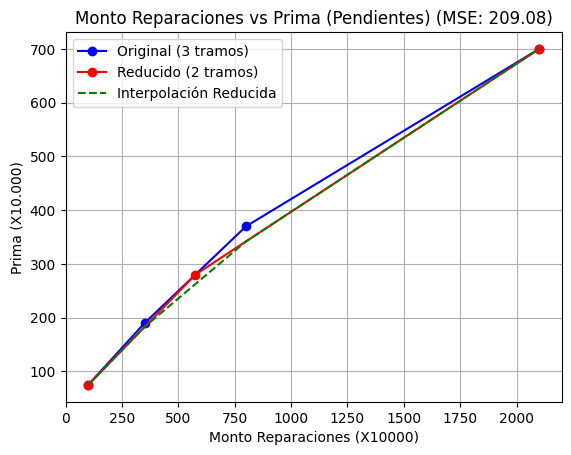

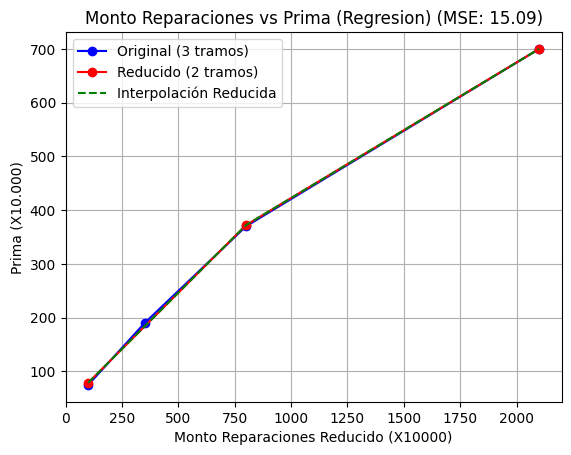

MSE Pendientes: 209.08
MSE Regresion: 15.09
Menor MSE: 15.09


In [14]:
# Reduccion de tramos
monto_reparaciones_reducido_pendientes, monto_reparaciones_prima_reducido_pendientes = reducir_a_dos_tramos(monto_reparaciones, monto_reparaciones_prima)
monto_reparaciones_reducido_regresion, monto_reparaciones_prima_reducido_regresion = reducir_a_dos_tramos_regresion(monto_reparaciones, monto_reparaciones_prima)

# Comparar reducción
monto_reparaciones_mse_pendientes = comparar_reduccion(monto_reparaciones, monto_reparaciones_prima, monto_reparaciones_reducido_pendientes, monto_reparaciones_prima_reducido_pendientes, "Monto Reparaciones (X10000)", "Monto Reparaciones", "Pendientes")
monto_reparaciones_mse_regresion = comparar_reduccion(monto_reparaciones, monto_reparaciones_prima, monto_reparaciones_reducido_regresion, monto_reparaciones_prima_reducido_regresion, "Monto Reparaciones Reducido (X10000)", "Monto Reparaciones", "Regresion")

# Resultados
print(f"MSE Pendientes: {monto_reparaciones_mse_pendientes:.2f}")
print(f"MSE Regresion: {monto_reparaciones_mse_regresion:.2f}")
print(f"Menor MSE: {min(monto_reparaciones_mse_pendientes, monto_reparaciones_mse_regresion):.2f}")

In [15]:
# Mostrar tramos seleccionados
mostrar_tramos("monto de reparaciones", monto_reparaciones, monto_reparaciones_prima, monto_reparaciones_reducido_regresion, monto_reparaciones_prima_reducido_regresion)

Tramos originales monto de reparaciones (X): [100, 350, 800, 2100]
Tramos originales monto de reparaciones (Y): [75, 190, 370, 700]
Nuevos tramos monto de reparaciones (X): [100, 800, 2100]
Nuevos tramos monto de reparaciones (Y): [79, 372, 700]


### Antiguedad del seguro

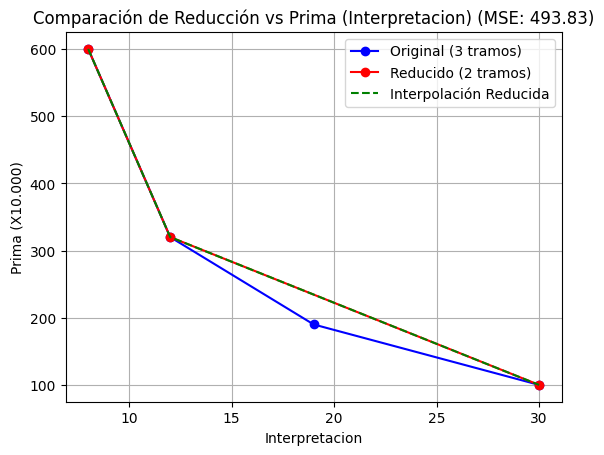

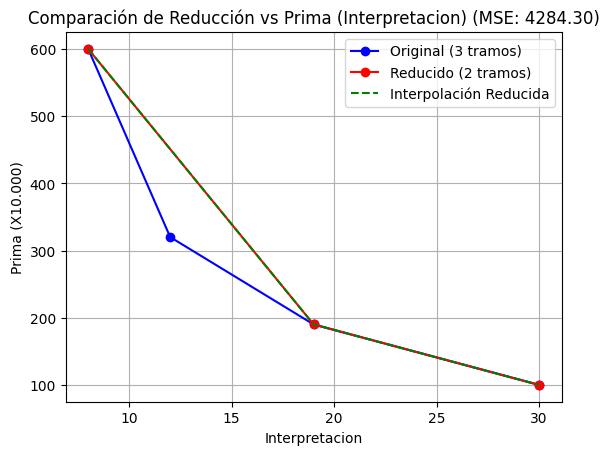

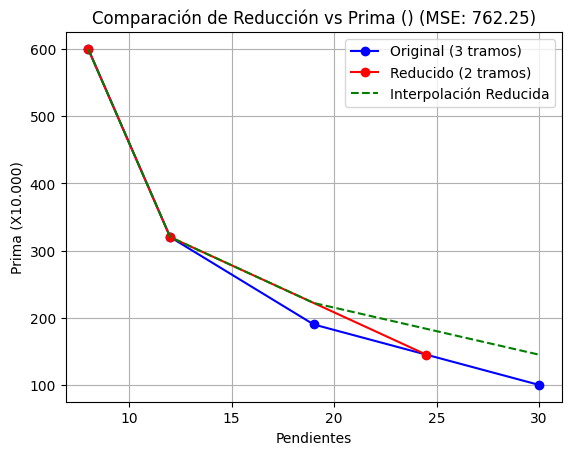

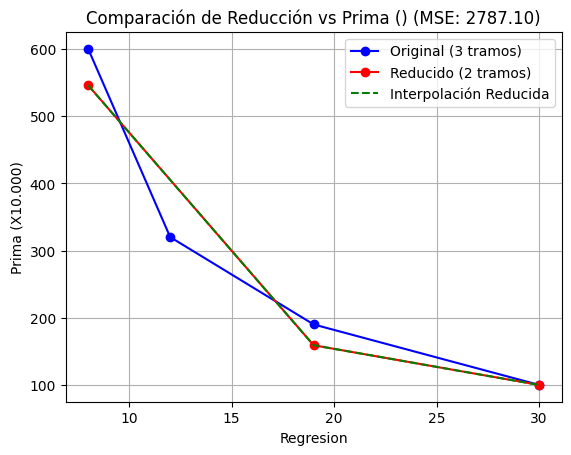

MSE Interpretacion: 493.83
MSE Interpretacion: 4284.30
MSE Pendientes: 762.25
MSE Regresion: 2787.10
Menor MSE: 493.83


In [16]:
# Reduccion de tramos
antiguedad_seguro_reducido_pendientes, antiguedad_seguro_prima_reducido_pendientes = reducir_a_dos_tramos(antiguedad_seguro, antiguedad_seguro_prima)
antiguedad_seguro_reducido_regresion, antiguedad_seguro_prima_reducido_regresion = reducir_a_dos_tramos_regresion(antiguedad_seguro, antiguedad_seguro_prima)

# Comparar reducción
antiguedad_seguro_mse_interpretacion1 = comparar_reduccion(antiguedad_seguro, antiguedad_seguro_prima, [8, 12, 30], [600, 320, 100], "Interpretacion", metodo="Interpretacion")
antiguedad_seguro_mse_interpretacion2 = comparar_reduccion(antiguedad_seguro, antiguedad_seguro_prima, [8, 19, 30], [600, 190, 100], "Interpretacion", metodo="Interpretacion")
antiguedad_seguro_mse_pendientes = comparar_reduccion(antiguedad_seguro, antiguedad_seguro_prima, antiguedad_seguro_reducido_pendientes, antiguedad_seguro_prima_reducido_pendientes, "Pendientes")
antiguedad_seguro_mse_regresion = comparar_reduccion(antiguedad_seguro, antiguedad_seguro_prima, antiguedad_seguro_reducido_regresion, antiguedad_seguro_prima_reducido_regresion, "Regresion")

# Resultados
print(f"MSE Interpretacion: {antiguedad_seguro_mse_interpretacion1:.2f}")
print(f"MSE Interpretacion: {antiguedad_seguro_mse_interpretacion2:.2f}")
print(f"MSE Pendientes: {antiguedad_seguro_mse_pendientes:.2f}")
print(f"MSE Regresion: {antiguedad_seguro_mse_regresion:.2f}")
print(f"Menor MSE: {min(antiguedad_seguro_mse_interpretacion1, antiguedad_seguro_mse_interpretacion2, antiguedad_seguro_mse_pendientes, antiguedad_seguro_mse_regresion):.2f}")

In [17]:
# Conclusion
print("Conclusion: Es mejor usar los tramos originales ya que al hacer alguna reduccion se pierde precision en la prediccion de la prima")

print("Tramos originales antiguedad del seguro (X):", antiguedad_seguro)
print("Tramos originales antiguedad del seguro (Y):", antiguedad_seguro_prima)

Conclusion: Es mejor usar los tramos originales ya que al hacer alguna reduccion se pierde precision en la prediccion de la prima
Tramos originales antiguedad del seguro (X): [8, 12, 19, 30]
Tramos originales antiguedad del seguro (Y): [600, 320, 190, 100]


### Clasificacion promedio

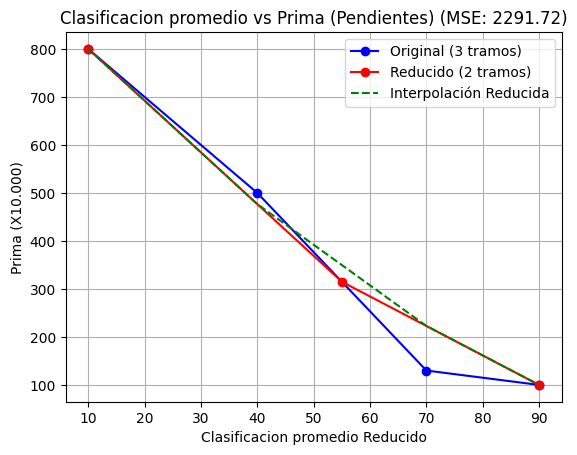

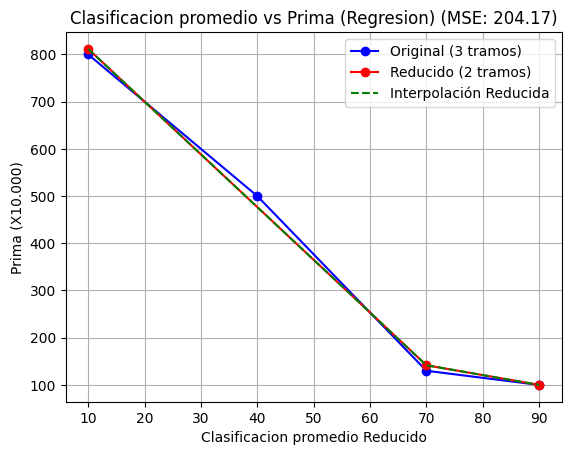

MSE Pendientes: 2291.72
MSE Regresion: 204.17
Menor MSE: 204.17


In [18]:
# Reduccion de tramos
calificacion_promedio_reducido_pendientes, calificacion_promedio_prima_reducido_pendientes = reducir_a_dos_tramos(calificacion_promedio, calificacion_promedio_prima)
calificacion_promedio_reducido_regresion, calificacion_promedio_prima_reducido_regresion = reducir_a_dos_tramos_regresion(calificacion_promedio, calificacion_promedio_prima)

# Graficar
calificacion_promedio_mse_pendientes = comparar_reduccion(calificacion_promedio, calificacion_promedio_prima, calificacion_promedio_reducido_pendientes, calificacion_promedio_prima_reducido_pendientes, "Clasificacion promedio Reducido", "Clasificacion promedio", "Pendientes")
calificacion_promedio_mse_regresion = comparar_reduccion(calificacion_promedio, calificacion_promedio_prima, calificacion_promedio_reducido_regresion, calificacion_promedio_prima_reducido_regresion, "Clasificacion promedio Reducido", "Clasificacion promedio", "Regresion")

# Resultados
print(f"MSE Pendientes: {calificacion_promedio_mse_pendientes:.2f}")
print(f"MSE Regresion: {calificacion_promedio_mse_regresion:.2f}")
print(f"Menor MSE: {min(calificacion_promedio_mse_pendientes, calificacion_promedio_mse_regresion):.2f}")

In [19]:
# Conclusion
print("Conclusion: Es mejor usar los tramos originales ya que al hacer alguna reduccion se pierde precision en la prediccion de la prima")

print("Tramos originales calificacion promedio (X):", calificacion_promedio)
print("Tramos originales calificacion promedio (Y):", calificacion_promedio_prima)

Conclusion: Es mejor usar los tramos originales ya que al hacer alguna reduccion se pierde precision en la prediccion de la prima
Tramos originales calificacion promedio (X): [10, 40, 70, 90]
Tramos originales calificacion promedio (Y): [800, 500, 130, 100]
